# Timer Log Part

In [2]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\titus\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [3]:
import logging
import time
from functools import wraps
import logging
from collections import Counter
import re
import numpy as np
import matplotlib.pyplot as plt


In [5]:
logger = logging.getLogger(__name__)
logger.setLevel("DEBUG")
handler = logging.StreamHandler()
log_format = "%(asctime)s %(levelname)s -- %(message)s"
formatter = logging.Formatter(log_format)
handler.setFormatter(formatter)
logger.addHandler(handler)

In [6]:
def timer(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        start = time.time()
        result = func(*args, **kwargs)
        end = time.time()
        logger.debug("{} ran in {}s".format(
            func.__name__, round(end - start, 2)))
        return result
    return wrapper


In [12]:
@timer
def count_dict(filename):
    counts = dict()
    words = re.findall(r'\w+', open(filename).read().lower())

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

In [13]:
count_dict("t8.shakespeare.txt")

2023-01-07 13:30:00,880 DEBUG -- count_dict ran in 0.51s
2023-01-07 13:30:00,880 DEBUG -- count_dict ran in 0.51s


{'this': 6853,
 'is': 9784,
 'the': 27660,
 '100th': 1,
 'etext': 245,
 'file': 20,
 'presented': 18,
 'by': 4476,
 'project': 251,
 'gutenberg': 236,
 'and': 26784,
 'in': 11123,
 'cooperation': 2,
 'with': 8016,
 'world': 905,
 'library': 232,
 'inc': 224,
 'from': 2654,
 'their': 2077,
 'of': 18191,
 'future': 17,
 'shakespeare': 268,
 'cdroms': 1,
 'often': 124,
 'releases': 1,
 'etexts': 8,
 'that': 11549,
 'are': 3894,
 'not': 8740,
 'placed': 11,
 'public': 57,
 'domain': 4,
 'has': 388,
 'certain': 176,
 'copyright': 228,
 'implications': 1,
 'you': 13860,
 'should': 1580,
 'read': 207,
 'electronic': 443,
 'version': 222,
 'complete': 246,
 'works': 249,
 'william': 349,
 '1990': 221,
 '1993': 221,
 'provided': 253,
 'illinois': 223,
 'benedictine': 223,
 'college': 226,
 'permission': 225,
 'machine': 223,
 'readable': 224,
 'copies': 446,
 'may': 1876,
 'be': 7130,
 'distributed': 443,
 'so': 5282,
 'long': 704,
 'as': 5975,
 'such': 1622,
 '1': 309,
 'for': 8341,
 'your': 6

In [14]:
@timer
def count_counter(filename):
  words = re.findall(r'\w+', open(filename).read().lower())
  word_counter = Counter(words)
  with open(filename) as file:
      for line in file:
          line_letters = [
              char for char in line.lower() if char.isalpha()
          ]
          word_counter.update(Counter(line_letters))
  return word_counter

In [15]:
count_counter("t8.shakespeare.txt")

2023-01-07 13:30:18,113 DEBUG -- count_counter ran in 1.68s
2023-01-07 13:30:18,113 DEBUG -- count_counter ran in 1.68s


Counter({'this': 6853,
         'is': 9784,
         'the': 27660,
         '100th': 1,
         'etext': 245,
         'file': 20,
         'presented': 18,
         'by': 4476,
         'project': 251,
         'gutenberg': 236,
         'and': 26784,
         'in': 11123,
         'cooperation': 2,
         'with': 8016,
         'world': 905,
         'library': 232,
         'inc': 224,
         'from': 2654,
         'their': 2077,
         'of': 18191,
         'future': 17,
         'shakespeare': 268,
         'cdroms': 1,
         'often': 124,
         'releases': 1,
         'etexts': 8,
         'that': 11549,
         'are': 3894,
         'not': 8740,
         'placed': 11,
         'public': 57,
         'domain': 4,
         'has': 388,
         'certain': 176,
         'copyright': 228,
         'implications': 1,
         'you': 13860,
         'should': 1580,
         'read': 207,
         'electronic': 443,
         'version': 222,
         'complete': 246,
       

Counting using a dict ran in 0.51s whereas using Counter() which took 1.68s

In [16]:
dict_list = []
counter_list = []
for i in range(100):
   start_time = time.time()
   count_dict("t8.shakespeare.txt")
   d = time.time() - start_time

   start_time = time.time()
   count_counter("t8.shakespeare.txt")
   c = time.time() - start_time

   dict_list.append(d)
   counter_list.append(c)


2023-01-07 13:35:46,870 DEBUG -- count_dict ran in 0.45s
2023-01-07 13:35:46,870 DEBUG -- count_dict ran in 0.45s
2023-01-07 13:35:48,568 DEBUG -- count_counter ran in 1.69s
2023-01-07 13:35:48,568 DEBUG -- count_counter ran in 1.69s
2023-01-07 13:35:49,047 DEBUG -- count_dict ran in 0.48s
2023-01-07 13:35:49,047 DEBUG -- count_dict ran in 0.48s
2023-01-07 13:35:50,625 DEBUG -- count_counter ran in 1.57s
2023-01-07 13:35:50,625 DEBUG -- count_counter ran in 1.57s
2023-01-07 13:35:51,098 DEBUG -- count_dict ran in 0.47s
2023-01-07 13:35:51,098 DEBUG -- count_dict ran in 0.47s
2023-01-07 13:35:52,719 DEBUG -- count_counter ran in 1.62s
2023-01-07 13:35:52,719 DEBUG -- count_counter ran in 1.62s
2023-01-07 13:35:53,218 DEBUG -- count_dict ran in 0.5s
2023-01-07 13:35:53,218 DEBUG -- count_dict ran in 0.5s
2023-01-07 13:35:54,788 DEBUG -- count_counter ran in 1.57s
2023-01-07 13:35:54,788 DEBUG -- count_counter ran in 1.57s
2023-01-07 13:35:55,264 DEBUG -- count_dict ran in 0.47s
2023-01-0

In [17]:
mean_dict = np.mean(dict_list)
mean_counter = np.mean(counter_list)
print("mean_dict : " ,mean_dict)
print("mean_counter : " ,mean_counter)
var_dict = np.var(dict_list)
var_counter = np.var(counter_list)
print("var_dict : " ,var_dict)
print("var_counter : " ,var_counter)

mean_dict :  0.48985546588897705
mean_counter :  1.6034943342208863
var_dict :  0.007850554595065227
var_counter :  0.079249127066351


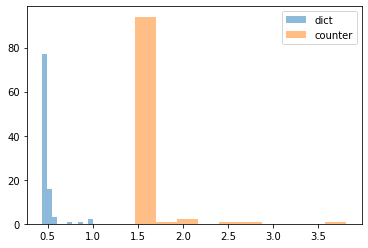

In [18]:
plt.figure()
plt.hist(dict_list, alpha=0.5, label='dict')
plt.hist(counter_list, alpha=0.5, label='counter')
plt.legend(loc='upper right')
plt.show()
